In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data, wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(4)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有四级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt.values

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
X = np.apply_along_axis(wpt1D, 1, X)

In [6]:
y = np.array(pd.read_csv(kingfa_datasets_path+"target.csv", index_col=0))

In [7]:
print(X.shape)
print(y.shape)

(3000, 256, 16)
(3000, 1)


In [8]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1024)

In [10]:
X_train = X_train.reshape(-1, 256, 16, 1)
X_test = X_test.reshape(-1, 256, 16, 1)
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16, kernel_size=(7, 5), input_shape=(256, 16, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [13]:
model.add(Conv2D(filters=32, kernel_size=(5, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

In [14]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [15]:
adam = Adam(lr=1e-4)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 12, 16)       576       
_________________________________________________________________
activation_1 (Activation)    (None, 250, 12, 16)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 6, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 6, 32)        7712      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 6, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 3, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6048)              0         
__________

In [17]:
model.compile(optimizer=adam, loss='squared_hinge', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_split=0.1)

Train on 2295 samples, validate on 255 samples
Epoch 1/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8179 - acc: 0.3329 - val_loss: 0.8164 - val_acc: 0.3255
Epoch 2/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8170 - acc: 0.3390 - val_loss: 0.8176 - val_acc: 0.3216
Epoch 3/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8153 - acc: 0.3577 - val_loss: 0.8145 - val_acc: 0.3255
Epoch 4/300
2295/2295 [==============================] - 7s 3ms/step - loss: 0.8151 - acc: 0.3329 - val_loss: 0.8134 - val_acc: 0.6667
Epoch 5/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8144 - acc: 0.3673 - val_loss: 0.8128 - val_acc: 0.6157
Epoch 6/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8135 - acc: 0.3804 - val_loss: 0.8141 - val_acc: 0.3255
Epoch 7/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.8129 - acc: 0.3556 - val_loss: 0.8115 - val_acc: 0.3529
Epoch 8/

Epoch 61/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6888 - acc: 0.9407 - val_loss: 0.6901 - val_acc: 0.9333
Epoch 62/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6879 - acc: 0.9425 - val_loss: 0.6913 - val_acc: 0.9255
Epoch 63/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6877 - acc: 0.9451 - val_loss: 0.6890 - val_acc: 0.9451
Epoch 64/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6871 - acc: 0.9447 - val_loss: 0.6883 - val_acc: 0.9294
Epoch 65/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6862 - acc: 0.9451 - val_loss: 0.6880 - val_acc: 0.9333
Epoch 66/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6861 - acc: 0.9512 - val_loss: 0.6873 - val_acc: 0.9333
Epoch 67/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6851 - acc: 0.9508 - val_loss: 0.6898 - val_acc: 0.9255
Epoch 68/300
2295/2295 [========================

2295/2295 [==============================] - 6s 3ms/step - loss: 0.6744 - acc: 0.9765 - val_loss: 0.6778 - val_acc: 0.9529
Epoch 122/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6743 - acc: 0.9760 - val_loss: 0.6775 - val_acc: 0.9529
Epoch 123/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6747 - acc: 0.9730 - val_loss: 0.6772 - val_acc: 0.9529
Epoch 124/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6741 - acc: 0.9756 - val_loss: 0.6766 - val_acc: 0.9569
Epoch 125/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6741 - acc: 0.9760 - val_loss: 0.6790 - val_acc: 0.9490
Epoch 126/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6742 - acc: 0.9756 - val_loss: 0.6768 - val_acc: 0.9529
Epoch 127/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6753 - acc: 0.9717 - val_loss: 0.6766 - val_acc: 0.9686
Epoch 128/300
2295/2295 [==============================

Epoch 181/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6699 - acc: 0.9922 - val_loss: 0.6732 - val_acc: 0.9647
Epoch 182/300
2295/2295 [==============================] - 7s 3ms/step - loss: 0.6698 - acc: 0.9926 - val_loss: 0.6726 - val_acc: 0.9686
Epoch 183/300
2295/2295 [==============================] - 7s 3ms/step - loss: 0.6696 - acc: 0.9930 - val_loss: 0.6716 - val_acc: 0.9882
Epoch 184/300
2295/2295 [==============================] - 7s 3ms/step - loss: 0.6696 - acc: 0.9926 - val_loss: 0.6721 - val_acc: 0.9765
Epoch 185/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6698 - acc: 0.9952 - val_loss: 0.6789 - val_acc: 0.9490
Epoch 186/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6700 - acc: 0.9913 - val_loss: 0.6726 - val_acc: 0.9686
Epoch 187/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6694 - acc: 0.9930 - val_loss: 0.6716 - val_acc: 0.9843
Epoch 188/300
2295/2295 [================

Epoch 241/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6679 - acc: 0.9987 - val_loss: 0.6699 - val_acc: 0.9843
Epoch 242/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6676 - acc: 0.9987 - val_loss: 0.6699 - val_acc: 0.9843
Epoch 243/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6677 - acc: 0.9991 - val_loss: 0.6701 - val_acc: 0.9843
Epoch 244/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6679 - acc: 0.9996 - val_loss: 0.6726 - val_acc: 0.9686
Epoch 245/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6680 - acc: 0.9978 - val_loss: 0.6699 - val_acc: 0.9843
Epoch 246/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6677 - acc: 0.9991 - val_loss: 0.6699 - val_acc: 0.9843
Epoch 247/300
2295/2295 [==============================] - 6s 3ms/step - loss: 0.6678 - acc: 0.9983 - val_loss: 0.6702 - val_acc: 0.9843
Epoch 248/300
2295/2295 [================

2295/2295 [==============================] - 6s 3ms/step - loss: 0.6670 - acc: 0.9996 - val_loss: 0.6689 - val_acc: 0.9922


In [19]:
score = model.evaluate(X_test, y_test)
print("LOSS:", score[0])
print("Accuracy:", score[1])

450/450 [==============================] - 0s 1ms/step
LOSS: 0.6681227034992642
Accuracy: 1.0


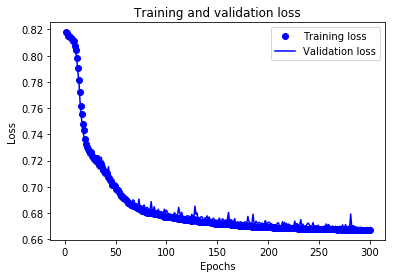

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

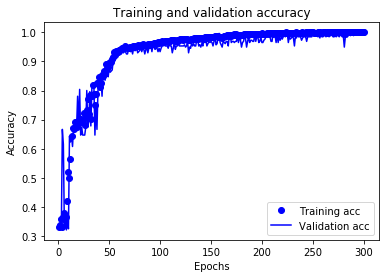

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()